In [1]:
## REQUIRED LIBRARIES
# For data wrangling 
import numpy as np
import pandas as pd
# For visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.max_rows = None
pd.options.display.max_columns = None
from xgboost import plot_importance
from matplotlib import pyplot
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [2]:
#!pip install sklearn

### Data Cleaning

In [3]:
# Read the data frame
df = pd.read_csv(r"C:\Users\William\Desktop\jo\nci\sem2\dapa\TravelInsurance_Prediction.csv")
df.shape

(1987, 10)

In [4]:
df.isnull().sum()

Id                     0
Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

In [5]:
df.head()

,Id,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [6]:
del df[df.columns[0]]

### Data Analysis

In [7]:
df.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


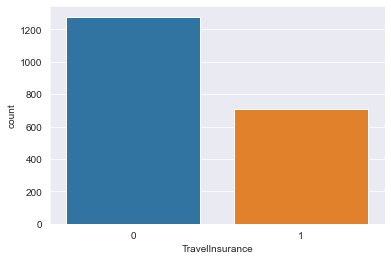

In [307]:
sns.set_style('darkgrid')
sns.countplot(data=df,x='TravelInsurance')
plt.show()

In [8]:
# Check variable data types
df.dtypes

Age                     int64
Employment Type        object
GraduateOrNot          object
AnnualIncome            int64
FamilyMembers           int64
ChronicDiseases         int64
FrequentFlyer          object
EverTravelledAbroad    object
TravelInsurance         int64
dtype: object

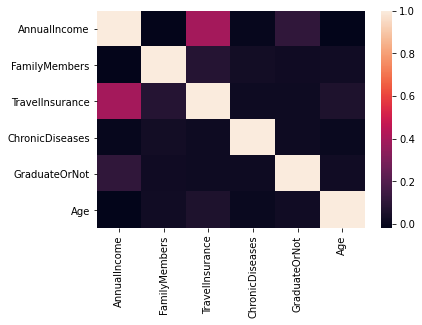

In [306]:
#co-relation plot

numerical = list(
    set(df.columns)
    - {
        "Employment Type",
        "GraduateOrNot ",
        "FrequentFlyer",
        "EverTravelledAbroad"
        
        
    }
)

# Calculate and plot
corr_matrix = df[numerical].corr()
sns.heatmap(corr_matrix);

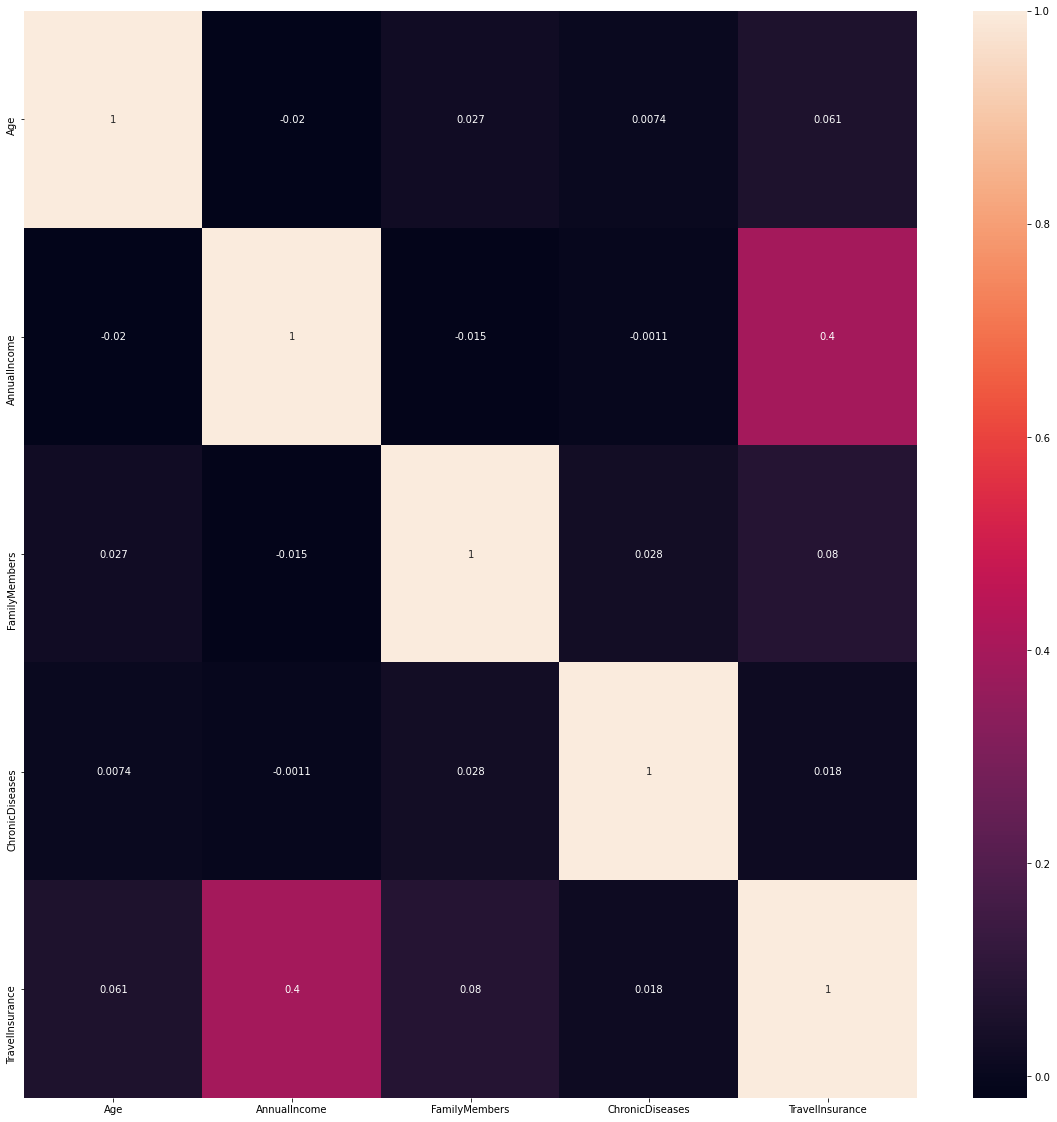

In [11]:
#co-relation plot

corrmat=df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_features].corr(),annot=True)


In [12]:
df.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [13]:
df.describe()

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000
mean,29.650226,9.327630e+05,4.752894,0.277806,0.357323
std,2.913308,3.768557e+05,1.609650,0.448030,0.479332
min,25.000000,3.000000e+05,2.000000,0.000000,0.000000
25%,28.000000,6.000000e+05,4.000000,0.000000,0.000000
50%,29.000000,9.000000e+05,5.000000,0.000000,0.000000
75%,32.000000,1.250000e+06,6.000000,1.000000,1.000000
max,35.000000,1.800000e+06,9.000000,1.000000,1.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  1987 non-null   int64 
 1   Employment Type      1987 non-null   object
 2   GraduateOrNot        1987 non-null   object
 3   AnnualIncome         1987 non-null   int64 
 4   FamilyMembers        1987 non-null   int64 
 5   ChronicDiseases      1987 non-null   int64 
 6   FrequentFlyer        1987 non-null   object
 7   EverTravelledAbroad  1987 non-null   object
 8   TravelInsurance      1987 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 139.8+ KB


#### Feature Encoding

In [15]:
#Binary Encoding
df['Employment Type'].replace({'Private Sector/Self Employed':0, 'Government Sector':1},inplace=True)
df['GraduateOrNot'].replace({'No':0, 'Yes':1},inplace=True)
df['FrequentFlyer'].replace({'No':0, 'Yes':1},inplace=True)
df['EverTravelledAbroad'].replace({'No':0, 'Yes':1},inplace=True)

In [16]:
df.describe()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
count,1987.000000,1987.000000,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000
mean,29.650226,0.286865,0.851535,9.327630e+05,4.752894,0.277806,0.209864,0.191243,0.357323
std,2.913308,0.452412,0.355650,3.768557e+05,1.609650,0.448030,0.407314,0.393379,0.479332
min,25.000000,0.000000,0.000000,3.000000e+05,2.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,0.000000,1.000000,6.000000e+05,4.000000,0.000000,0.000000,0.000000,0.000000
50%,29.000000,0.000000,1.000000,9.000000e+05,5.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,1.000000,1.000000,1.250000e+06,6.000000,1.000000,0.000000,0.000000,1.000000
max,35.000000,1.000000,1.000000,1.800000e+06,9.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
df1 = df.copy() #create a copy

### Feature Scaling

In [18]:
#import required library
#Normalization is useful when your data has varying scales 
#and the algorithm you are using does not make assumptions about the distribution of your data,

from sklearn.preprocessing import MinMaxScaler


In [19]:
to_scale = ['AnnualIncome','FamilyMembers','Age']
scaler = MinMaxScaler()

In [20]:
df1[to_scale] = scaler.fit_transform(df1[to_scale])

In [21]:
df1.describe()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
count,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000
mean,0.465023,0.286865,0.851535,0.421842,0.393271,0.277806,0.209864,0.191243,0.357323
std,0.291331,0.452412,0.355650,0.251237,0.229950,0.448030,0.407314,0.393379,0.479332
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.300000,0.000000,1.000000,0.200000,0.285714,0.000000,0.000000,0.000000,0.000000
50%,0.400000,0.000000,1.000000,0.400000,0.428571,0.000000,0.000000,0.000000,0.000000
75%,0.700000,1.000000,1.000000,0.633333,0.571429,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:

X = df1[['Age','Employment Type','GraduateOrNot','AnnualIncome','FamilyMembers','ChronicDiseases','FrequentFlyer','EverTravelledAbroad']]
y = df['TravelInsurance']
df1

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0.6,1,1,0.066667,0.571429,1,0,0,0
1,0.6,0,1,0.633333,0.714286,0,0,0,0
2,0.9,0,1,0.133333,0.285714,1,0,0,1
3,0.3,0,1,0.266667,0.142857,1,0,0,0
4,0.3,0,1,0.266667,0.857143,1,1,0,0
5,0.0,0,0,0.566667,0.285714,0,0,0,0
6,0.6,1,1,0.666667,0.285714,0,0,0,0
7,0.6,0,1,0.700000,0.142857,0,1,1,1
8,0.3,0,1,0.766667,0.571429,1,1,1,1
9,0.8,1,1,0.333333,0.142857,0,1,0,0


### Model Training

In [32]:
#Train test split
from sklearn.model_selection import train_test_split
from collections import Counter

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
Counter(y_train)

Counter({1: 463, 0: 868})

In [34]:
#!pip install imblearn


In [35]:
#from imblearn.over_sampling import RandomOverSampler
#oversample = RandomOverSampler(0.75)
#X_over, y_over = oversample.fit_resample(X_train, y_train)
#Counter(y_over)

In [36]:
#Smote oversampling
random.seed(111)
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_over, y_over = oversample.fit_resample(X_train, y_train)
Counter(y_over)

Counter({1: 868, 0: 868})

In [37]:
Counter(y_over)

Counter({1: 868, 0: 868})

In [38]:
#pip install xgboost

In [168]:
#Cross Validation
random.seed(0)
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)


In [236]:
#params={
    #"learning_rate" : [0.001, 0.01,0.1],
    #"max_depth" : [1,2,3,4,5,10],
   #"min_child_weight" : [1,3,5,7],
   #"gamma" : [ 0.1,0.25,0.5],
   #"colsample_bytree" :[0.3,0.4,0.5,0.7]
#}

In [285]:
#XGBoost Classifier
random.seed(2)
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from xgboost import XGBClassifier
params = {'alpha': [0.001, 0.01,0.1], 'max_depth': [1,2,3,4,5,10], 'learning_rate': [0.1,0.25,0.5]}
clf = XGBClassifier()
random_search=RandomizedSearchCV(clf,param_distributions=params,n_iter=5,scoring='recall',n_jobs=-1,cv=cv,verbose=3)
random_search.fit(X_over, y_over)

Fitting 15 folds for each of 5 candidates, totalling 75 fits


RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=1),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,...
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
      

In [286]:
random.seed(10)
random_search.fit(X_over, y_over)

Fitting 15 folds for each of 5 candidates, totalling 75 fits


RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=1),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,...
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
      

In [287]:
#Apply model on test data
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

xgb = random_search.best_estimator_
y_pred = xgb.predict(X_test)
print('XGBoost model accuracy score: {0:0.3f}'. format(accuracy_score(y_test, y_pred)))
print('XGBoost model F1 score: {0:0.3f}'. format(f1_score(y_test, y_pred)))
print('XGBoost model precision score: {0:0.3f}'. format(precision_score(y_test, y_pred)))
print('XGBoost model recall score: {0:0.3f}'. format(recall_score(y_test, y_pred)))

XGBoost model accuracy score: 0.811
XGBoost model F1 score: 0.716
XGBoost model precision score: 0.825
XGBoost model recall score: 0.632


C:\Users\William\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


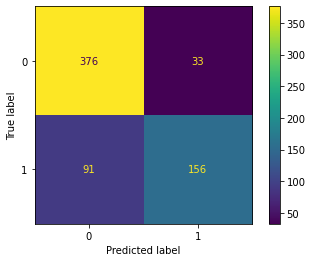

In [288]:
#Confusion Matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(xgb, X_test, y_test)  
plt.show()

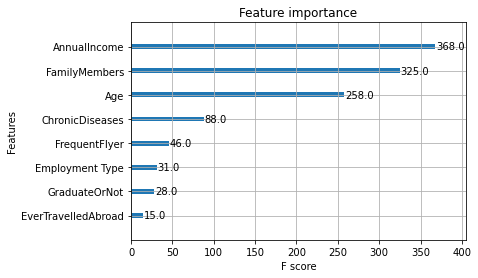

In [289]:
# plot feature importance
plot_importance(xgb)
pyplot.show()

In [290]:
y_pred_proba = xgb.predict_proba(X_test)[:,1]

In [291]:
#best Estimator
random_search.best_estimator_

XGBClassifier(alpha=0.1, base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.5, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0.100000001, ...)

In [292]:
random_search.best_params_

{'max_depth': 4, 'learning_rate': 0.5, 'alpha': 0.1}

In [293]:
y_pred_proba

array([1.21921659e-01, 9.43823636e-01, 2.01463386e-01, 5.18837832e-02,
       9.91624296e-01, 7.31032491e-02, 7.22020715e-02, 3.84805322e-01,
       2.30729178e-01, 1.67405665e-01, 9.95203376e-01, 5.09407043e-01,
       5.52840173e-01, 3.99025828e-02, 2.88518786e-01, 4.56689864e-01,
       1.62301496e-01, 1.18541658e-01, 2.45553315e-01, 2.30729178e-01,
       3.57169241e-01, 9.63043869e-01, 7.62650603e-03, 3.90379876e-02,
       4.55109738e-02, 3.36332945e-03, 1.41288191e-01, 2.76379287e-01,
       2.74901301e-01, 3.08818102e-01, 2.02226505e-01, 2.51051068e-01,
       9.93443370e-01, 3.81416112e-01, 2.51551658e-01, 8.55538696e-02,
       3.08818102e-01, 3.08818102e-01, 2.57098168e-01, 9.48223248e-02,
       5.98961353e-01, 1.28855348e-01, 4.98772115e-02, 2.51993835e-01,
       5.34515223e-03, 1.99570879e-01, 7.66813278e-01, 9.88172233e-01,
       9.23417389e-01, 9.78112742e-02, 4.84230593e-02, 1.38023468e-02,
       5.14896177e-02, 7.47768819e-01, 2.06541583e-01, 9.87487316e-01,
      

### Threshold Fitting

In [294]:
#function to get class based on probability
def get_y_pred(p, proba_pred):
    y_pred = []
    for i in range(0,len(proba_pred)):
        if proba_pred[i] > p:
            y_pred.append(1)
        else:
            y_pred.append(0)
    return pd.Series(y_pred)

In [301]:
prob = [0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45]
prob = [0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45]
recall=[]
accuracy=[]

for p in prob:
    y_pred = get_y_pred(p,y_pred_proba)
    print(f'At P = {p}, Recall score = {recall_score(y_test,y_pred)}')
    recall.append(recall_score(y_test,y_pred)*100)
   
    print(f'At P = {p}, Accuracy score = {accuracy_score(y_test,y_pred)}')
    accuracy.append(accuracy_score(y_test,y_pred)*100)
    #print(confusion_matrix(y_test,y_pred))
    print('\n')

At P = 0.1, Recall score = 0.8663967611336032
At P = 0.1, Accuracy score = 0.5640243902439024


At P = 0.15, Recall score = 0.805668016194332
At P = 0.15, Accuracy score = 0.6219512195121951


At P = 0.2, Recall score = 0.7651821862348178
At P = 0.2, Accuracy score = 0.6722560975609756


At P = 0.25, Recall score = 0.7246963562753036
At P = 0.25, Accuracy score = 0.7012195121951219


At P = 0.3, Recall score = 0.7004048582995951
At P = 0.3, Accuracy score = 0.7286585365853658


At P = 0.35, Recall score = 0.6882591093117408
At P = 0.35, Accuracy score = 0.7515243902439024


At P = 0.4, Recall score = 0.659919028340081
At P = 0.4, Accuracy score = 0.7713414634146342


At P = 0.45, Recall score = 0.6437246963562753
At P = 0.45, Accuracy score = 0.7987804878048781




In [304]:
import pandas as pd

th = pd.DataFrame(
    {'Threshold': prob,
     'Accuracy': accuracy,
     'Recall': recall
    })
th

,Threshold,Accuracy,Recall
0,0.10,56.402439,86.639676
1,0.15,62.195122,80.566802
2,0.20,67.225610,76.518219
3,0.25,70.121951,72.469636
4,0.30,72.865854,70.040486
5,0.35,75.152439,68.825911
6,0.40,77.134146,65.991903
7,0.45,79.878049,64.372470


<AxesSubplot:xlabel='Threshold'>

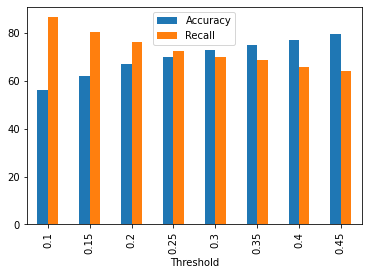

In [305]:
th.plot(x="Threshold", y=["Accuracy", "Recall"], kind="bar")